In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train.csv
data/test.csv


In [3]:
training = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.nan
all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc ='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [7]:
def df_summary(all_data):
    summary_data = []

    for col in all_data.columns:
        col_dtype = all_data[col].dtype
        num_of_nulls = all_data[col].isnull().sum()
        num_of_non_null = all_data[col].notnull().sum()
        num_of_distinct_values = all_data[col].nunique()
        percentage_of_nulls = (num_of_nulls/all_data.shape[0]) * 100
        percentage_of_nulls = f'{round(percentage_of_nulls, 4)}%'

        if num_of_distinct_values <= 10:
            distinct_values_counts = all_data[col].value_counts().to_dict()
        else:
            top_10_values_counts =all_data[col].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key = lambda item: item[1], reverse = True)}


        summary_data.append({
            'col_name': col,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_null': num_of_non_null,
            'percentage_of_nulls':  percentage_of_nulls,
            'distinct_values_counts': distinct_values_counts
        })
        
    summary_data = pd.DataFrame(summary_data)
    return summary_data

In [8]:
summary_df = df_summary(all_data)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_null,percentage_of_nulls,distinct_values_counts
0,PassengerId,int64,0,1309,0.0%,"{1309: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, ..."
1,Survived,float64,418,891,31.9328%,"{0.0: 549, 1.0: 342}"
2,Pclass,int64,0,1309,0.0%,"{3: 709, 1: 323, 2: 277}"
3,Name,object,0,1309,0.0%,"{'Kelly, Mr. James': 2, 'Connolly, Miss. Kate'..."
4,Sex,object,0,1309,0.0%,"{'male': 843, 'female': 466}"
5,Age,float64,263,1046,20.0917%,"{24.0: 47, 22.0: 43, 21.0: 41, 30.0: 40, 18.0:..."
6,SibSp,int64,0,1309,0.0%,"{0: 891, 1: 319, 2: 42, 4: 22, 3: 20, 8: 9, 5: 6}"
7,Parch,int64,0,1309,0.0%,"{0: 1002, 1: 170, 2: 113, 3: 8, 5: 6, 4: 6, 6:..."
8,Ticket,object,0,1309,0.0%,"{'CA. 2343': 11, 'CA 2144': 8, '1601': 8, 'S.O..."
9,Fare,float64,1,1308,0.0764%,"{8.05: 60, 13.0: 59, 7.75: 55, 26.0: 50, 7.895..."


In [9]:
summary_df = df_summary(training)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_null,percentage_of_nulls,distinct_values_counts
0,PassengerId,int64,0,891,0.0%,"{891: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7..."
1,Survived,int64,0,891,0.0%,"{0: 549, 1: 342}"
2,Pclass,int64,0,891,0.0%,"{3: 491, 1: 216, 2: 184}"
3,Name,object,0,891,0.0%,"{'Dooley, Mr. Patrick': 1, 'Braund, Mr. Owen H..."
4,Sex,object,0,891,0.0%,"{'male': 577, 'female': 314}"
5,Age,float64,177,714,19.8653%,"{24.0: 30, 22.0: 27, 18.0: 26, 28.0: 25, 30.0:..."
6,SibSp,int64,0,891,0.0%,"{0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5}"
7,Parch,int64,0,891,0.0%,"{0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}"
8,Ticket,object,0,891,0.0%,"{'1601': 7, 'CA. 2343': 7, '347082': 7, '31012..."
9,Fare,float64,0,891,0.0%,"{8.05: 43, 13.0: 42, 7.8958: 38, 7.75: 34, 26...."


In [10]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

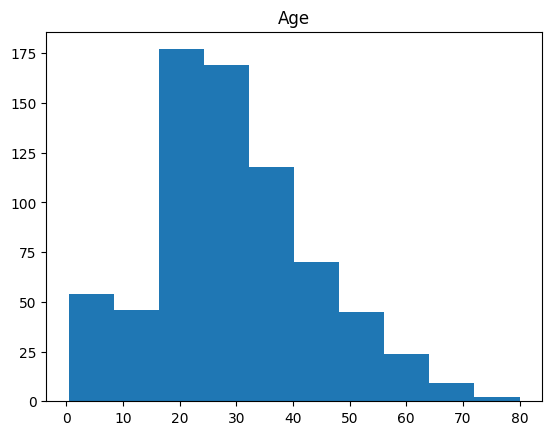

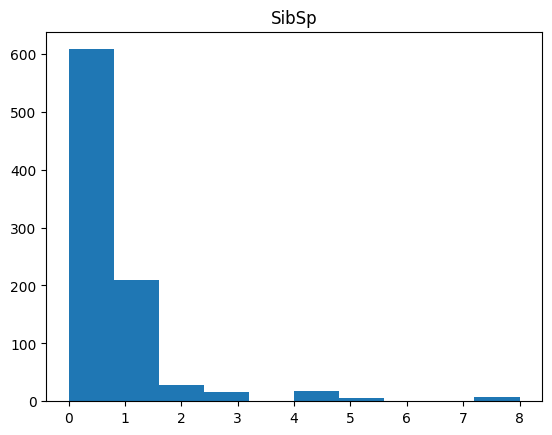

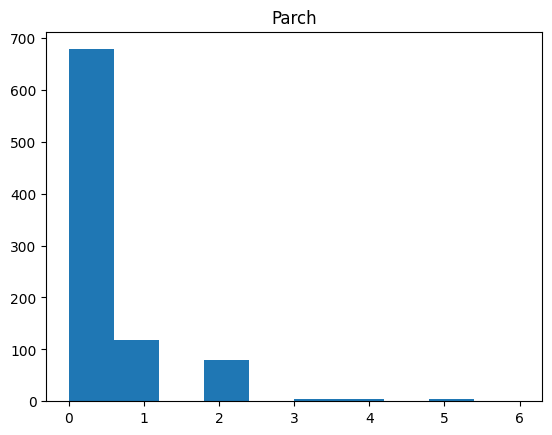

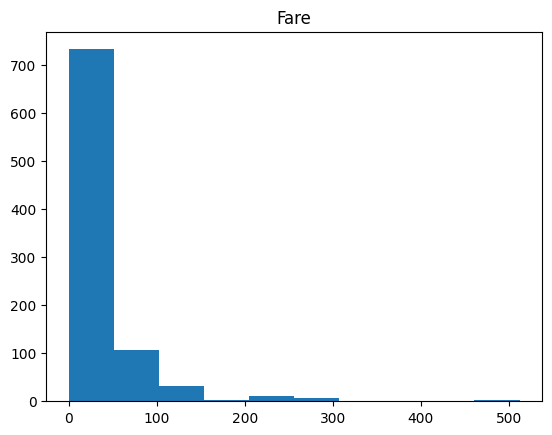

In [11]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

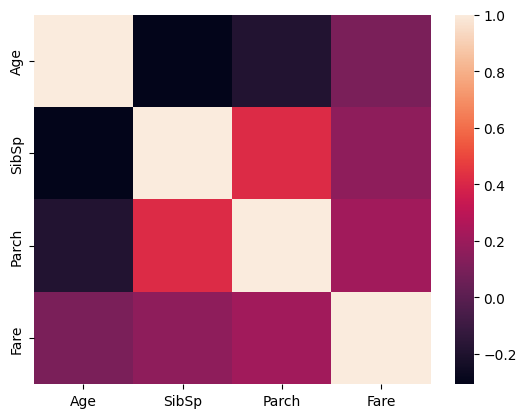

In [12]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [13]:
pd.pivot_table(training, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.mean())

all_data.dropna(subset=['Embarked'], inplace = True)

""" all_data['norm_fare'] = np.log(all_data.Fare+1)
 """

all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'train_test']], drop_first=True)

X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test  = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test == 1]['Survived']
y_train.shape

(889,)

In [15]:
""" fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(all_data['Fare'])
axs[1].hist(all_data['norm_fare'])

plt.tight_layout()
plt.show() """

" fig, axs = plt.subplots(1, 2, figsize=(12, 5))\naxs[0].hist(all_data['Fare'])\naxs[1].hist(all_data['norm_fare'])\n\nplt.tight_layout()\nplt.show() "

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', "Parch", 'Fare']]= scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'Fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
y_test = all_data[all_data.train_test==0].Survived

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [18]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean()) 

[0.7752809  0.75280899 0.76404494 0.78651685 0.80898876 0.78651685
 0.79775281 0.78651685 0.76404494 0.79545455]
0.7817926455566905


In [19]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.79775281 0.7752809  0.82022472 0.78651685 0.7752809
 0.78651685 0.78651685 0.80898876 0.85227273]
0.7964632277834526


In [20]:
dt = tree.DecisionTreeClassifier (random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.71910112 0.7752809  0.71910112 0.76404494 0.82022472 0.76404494
 0.79775281 0.74157303 0.85393258 0.81818182]
0.7773237997957099


In [21]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.75280899 0.82022472 0.71910112 0.79775281 0.86516854 0.79775281
 0.82022472 0.79775281 0.83146067 0.78409091]
0.7986338100102145


In [22]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.71910112 0.80898876 0.74157303 0.87640449 0.88764045 0.82022472
 0.80898876 0.7752809  0.82022472 0.81818182]
0.8076608784473953


In [23]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.85393258 0.7752809  0.87640449 0.82022472 0.79775281
 0.83146067 0.79775281 0.85393258 0.85227273]
0.8268003064351379


In [24]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.79775281 0.83146067 0.75280899 0.85393258 0.84269663 0.84269663
 0.83146067 0.7752809  0.8988764  0.79545455]
0.8222420837589377


In [25]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('gnb', gnb), ('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc),  ('xgb', xgb)])

In [26]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.85393258 0.76404494 0.86516854 0.87640449 0.79775281
 0.83146067 0.79775281 0.88764045 0.85227273]
0.8335418794688458


In [27]:
""" voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled)
basic_submission = {'PassangerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False) """

" voting_clf.fit(X_train_scaled,y_train)\ny_hat_base_vc = voting_clf.predict(X_test_scaled)\nbasic_submission = {'PassangerId': test.PassengerId, 'Survived': y_hat_base_vc}\nbase_submission = pd.DataFrame(data=basic_submission)\nbase_submission.to_csv('base_submission.csv', index=False) "

In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV"""

In [ ]:
"""def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))"""

In [ ]:
gnb.fit(X_train_scaled, y_train)
print(gnb.score(X_test_scaled, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [418, 889]